

<h1 align="center"><font size="5">Predicting Customer Category Of Telecommunication Users</font></h1>

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Load Data From CSV File  

In [2]:
df = pd.read_csv(r'E:\Datasets\teleCustCat.csv', encoding= 'unicode_escape')   
df.head(100) 

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,17,33,0,9,23,5,3,0,0,1,4
96,1,55,53,1,21,34,1,8,0,0,2,3
97,3,43,36,1,5,107,1,19,0,1,3,2
98,2,47,25,1,5,21,1,1,0,1,2,3


In [3]:
df.isnull()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [5]:
df.shape

(1000, 12)

<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D9311A1C8>]],
      dtype=object)

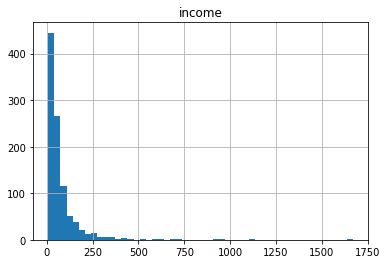

In [7]:
df.hist(column='income', bins=50)

Text(0.5, 1.0, 'scatter')

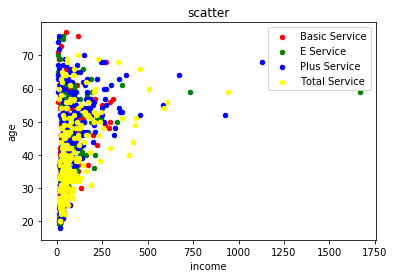

In [8]:
ax = df[df.custcat==1].plot.scatter(x='income', y='age', color='red', label='Basic Service')
df[df.custcat==2].plot.scatter(x='income', y='age', color='green', label='E Service', ax=ax)
df[df.custcat==3].plot.scatter(x='income', y='age', color='blue', label='Plus Service', ax=ax)
df[df.custcat==4].plot.scatter(x='income', y='age', color='yellow', label='Total Service', ax=ax)
ax.set_title("scatter")

# Pre-processing:  Feature selection/extraction

In [9]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2,  13,  44,   1,   9,  64,   4,   5,   0,   0,   2],
       [  3,  11,  33,   1,   7, 136,   5,   5,   0,   0,   6],
       [  3,  68,  52,   1,  24, 116,   1,  29,   0,   1,   2],
       [  2,  33,  33,   0,  12,  33,   2,   0,   0,   1,   1],
       [  2,  23,  30,   1,   9,  30,   1,   2,   0,   0,   4]],
      dtype=int64)

In [10]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data 

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Divide the dataset into Training and Test Set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

# Classification 

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Naive Bayes
- Random Forest

# K Nearest Neighbor(KNN)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 10
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_KNN=neigh.predict(X_test)
    print("The predicted values using K = ", n, "is ", yhat_KNN[0:5])

The predicted values using K =  1 is  [3 3 1 4 4]
The predicted values using K =  2 is  [3 1 1 2 2]
The predicted values using K =  3 is  [3 3 1 4 4]
The predicted values using K =  4 is  [3 1 3 2 4]
The predicted values using K =  5 is  [3 3 3 2 4]
The predicted values using K =  6 is  [3 3 3 2 4]
The predicted values using K =  7 is  [3 3 4 2 4]
The predicted values using K =  8 is  [3 2 4 2 4]
The predicted values using K =  9 is  [3 1 4 2 4]


# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree_criterions = ['entropy', 'gini']
for i in dtree_criterions:
    drugTree = DecisionTreeClassifier(criterion=i)
    drugTree.fit(X_train, y_train)
    predTree = drugTree.predict(X_test)
    print ("The values predicted by Decision Tree using criterion = ",i," is ", predTree [0:5])

The values predicted by Decision Tree using criterion =  entropy  is  [3 3 4 4 4]
The values predicted by Decision Tree using criterion =  gini  is  [3 4 2 4 4]


# Support Vector Machine

In [15]:
from sklearn import svm
svm_kernels = ['rbf', 'linear', 'poly', 'sigmoid']
for i in svm_kernels:
    clf = svm.SVC(kernel=i)
    clf.fit(X_train, y_train) 
    yhat_SVM = clf.predict(X_test)
    print("The values predicted by SVM using kernels = ", i, " is ", yhat_SVM [0:5])

The values predicted by SVM using kernels =  rbf  is  [3 1 4 4 4]
The values predicted by SVM using kernels =  linear  is  [3 1 4 4 4]
The values predicted by SVM using kernels =  poly  is  [3 1 2 4 4]
The values predicted by SVM using kernels =  sigmoid  is  [1 1 4 1 4]


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
c_param_range=[0.001,0.01,0.1]
lr_solvers=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
for i in lr_solvers:
    for f in c_param_range:
        LR = LogisticRegression(C=f, solver=i).fit(X_train,y_train)
        yhat_LR = LR.predict(X_test)
        print("The values predicted by Logistic Regression using c = ",f," and solver = ",i, " is ",yhat_LR[0:5])


The values predicted by Logistic Regression using c =  0.001  and solver =  liblinear  is  [1 1 4 4 4]
The values predicted by Logistic Regression using c =  0.01  and solver =  liblinear  is  [3 1 4 4 4]
The values predicted by Logistic Regression using c =  0.1  and solver =  liblinear  is  [3 1 4 4 4]
The values predicted by Logistic Regression using c =  0.001  and solver =  newton-cg  is  [3 1 4 1 4]
The values predicted by Logistic Regression using c =  0.01  and solver =  newton-cg  is  [3 1 4 4 4]
The values predicted by Logistic Regression using c =  0.1  and solver =  newton-cg  is  [3 1 4 4 4]
The values predicted by Logistic Regression using c =  0.001  and solver =  lbfgs  is  [3 1 4 1 4]
The values predicted by Logistic Regression using c =  0.01  and solver =  lbfgs  is  [3 1 4 4 4]
The values predicted by Logistic Regression using c =  0.1  and solver =  lbfgs  is  [3 1 4 4 4]
The values predicted by Logistic Regression using c =  0.001  and solver =  sag  is  [3 1 4 1 

# Naive bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_NB = gnb.fit(X_train, y_train).predict(X_test)
print("The values predicted by Naive Bayes is ", y_pred_NB[0:5])

The values predicted by Naive Bayes is  [1 1 4 1 4]


# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_criterion=['entropy', 'gini']
for i in rf_criterion:
    clf=RandomForestClassifier(criterion=i)
    clf.fit(X_train,y_train)
    y_pred_RF=clf.predict(X_test)
    print("The values predicted by Random Forest using criterion = ", i," is ",y_pred_RF[0:5])


The values predicted by Random Forest using criterion =  entropy  is  [1 1 4 4 4]
The values predicted by Random Forest using criterion =  gini  is  [1 1 4 4 4]


# Model Evaluation using Test set

In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### KNN

In [20]:
Ks = 10
accuracy_scor = np.zeros((Ks-1))
f1_scor = np.zeros((Ks-1))


for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_KNN=neigh.predict(X_test)
    accuracy_scor[n-1] = accuracy_score(y_test, yhat_KNN)
    f1_scor[n-1] = f1_score(y_test, yhat_KNN, average = 'weighted')
    print("The accuracy score with k = ",n, "is ",accuracy_scor[n-1])
    print("The f1 score with k = ",n, "is ",f1_scor[n-1])
    

print( "\nThe best accuracy score for KNN was ", accuracy_scor.max(), "with k=", accuracy_scor.argmax()+1) 
print( "The best f1 score for KNN was ", f1_scor.max(), "with k=", f1_scor.argmax()+1) 

The accuracy score with k =  1 is  0.28
The f1 score with k =  1 is  0.2802232381373485
The accuracy score with k =  2 is  0.2733333333333333
The f1 score with k =  2 is  0.2375438379466512
The accuracy score with k =  3 is  0.30666666666666664
The f1 score with k =  3 is  0.29636075152265373
The accuracy score with k =  4 is  0.33
The f1 score with k =  4 is  0.32184319699462793
The accuracy score with k =  5 is  0.34
The f1 score with k =  5 is  0.332524617158891
The accuracy score with k =  6 is  0.31666666666666665
The f1 score with k =  6 is  0.31129871928136155
The accuracy score with k =  7 is  0.34
The f1 score with k =  7 is  0.3376389176769396
The accuracy score with k =  8 is  0.31666666666666665
The f1 score with k =  8 is  0.3104490811341972
The accuracy score with k =  9 is  0.32666666666666666
The f1 score with k =  9 is  0.32043510992298024

The best accuracy score for KNN was  0.34 with k= 5
The best f1 score for KNN was  0.3376389176769396 with k= 7


#### Classification Report of KNN

In [21]:
neigh = KNeighborsClassifier(n_neighbors = accuracy_scor.argmax()+1).fit(X_train,y_train)
yhat_KNN=neigh.predict(X_test)
print (classification_report(y_test, yhat_KNN))

              precision    recall  f1-score   support

           1       0.37      0.46      0.41        81
           2       0.33      0.42      0.37        57
           3       0.34      0.30      0.32        86
           4       0.29      0.20      0.23        76

    accuracy                           0.34       300
   macro avg       0.33      0.34      0.33       300
weighted avg       0.33      0.34      0.33       300



### Decision tree

In [22]:
f = 0
ascore_dtree = np.zeros(2)
fscore_dtree = np.zeros(2)
dtree_criterions = ['entropy', 'gini']
for i in dtree_criterions:
    drugTree = DecisionTreeClassifier(criterion=i)
    drugTree.fit(X_train, y_train)
    predTree = drugTree.predict(X_test)
    ascore_dtree[f] = accuracy_score(y_test, predTree)
    fscore_dtree[f] = f1_score(y_test, predTree, average = 'weighted')
    print("DecisionTrees's Accuracy with criterion = ", i," using Accuracy Score: ", accuracy_score(y_test, predTree))
    print("DecisionTrees's Accuracy with criterion = ", i," using F1 Score: ", f1_score(y_test, predTree, average = 'weighted'))
    f += 1
print("\nThe best accuracy score using Decision Tree is ",ascore_dtree.max())
print("The best f1 score using Decision Tree is ",fscore_dtree.max())

DecisionTrees's Accuracy with criterion =  entropy  using Accuracy Score:  0.29333333333333333
DecisionTrees's Accuracy with criterion =  entropy  using F1 Score:  0.2930596692591738
DecisionTrees's Accuracy with criterion =  gini  using Accuracy Score:  0.31333333333333335
DecisionTrees's Accuracy with criterion =  gini  using F1 Score:  0.31317978112687894

The best accuracy score using Decision Tree is  0.31333333333333335
The best f1 score using Decision Tree is  0.31317978112687894


#### Classification Report of Decision Tree

In [23]:
k = ['entropy','gini']
for i in k:
    drugTree = DecisionTreeClassifier(criterion=i)
    drugTree.fit(X_train, y_train)
    predTree = drugTree.predict(X_test)
    print("Classification report for criterion = ",i,"\n\n",classification_report(y_test, predTree))


Classification report for criterion =  entropy 

               precision    recall  f1-score   support

           1       0.34      0.33      0.34        81
           2       0.30      0.35      0.33        57
           3       0.31      0.31      0.31        86
           4       0.28      0.25      0.26        76

    accuracy                           0.31       300
   macro avg       0.31      0.31      0.31       300
weighted avg       0.31      0.31      0.31       300

Classification report for criterion =  gini 

               precision    recall  f1-score   support

           1       0.40      0.44      0.42        81
           2       0.22      0.23      0.22        57
           3       0.37      0.33      0.35        86
           4       0.31      0.30      0.30        76

    accuracy                           0.33       300
   macro avg       0.32      0.33      0.32       300
weighted avg       0.33      0.33      0.33       300



### Support Vector Machine

In [24]:
f=0
ascore_svm = np.zeros(4)
fscore_svm = np.zeros(4)
svm_kernels = ['rbf', 'linear', 'poly', 'sigmoid']

for i in svm_kernels:
    clf = svm.SVC(kernel=i)
    clf.fit(X_train, y_train) 
    yhat_SVM = clf.predict(X_test)
    ascore_svm[f] = accuracy_score(y_test, yhat_SVM)
    fscore_svm[f] = f1_score(y_test, yhat_SVM, average='weighted')
    print("The accuracy score for SVM with kernel = ", i," is : ", accuracy_score(y_test, yhat_SVM))
    print("The f1 score for SVM with kernel = ", i," is: ", f1_score(y_test, yhat_SVM, average='weighted'))
    f += 1
print("\nThe best accuracy score using SVM is ",ascore_svm.max())
print("The best f1 score using SVM is ",fscore_svm.max())    

The accuracy score for SVM with kernel =  rbf  is :  0.36666666666666664
The f1 score for SVM with kernel =  rbf  is:  0.36008658258444315
The accuracy score for SVM with kernel =  linear  is :  0.41
The f1 score for SVM with kernel =  linear  is:  0.4049072713296851
The accuracy score for SVM with kernel =  poly  is :  0.35
The f1 score for SVM with kernel =  poly  is:  0.3374689864356919
The accuracy score for SVM with kernel =  sigmoid  is :  0.3566666666666667
The f1 score for SVM with kernel =  sigmoid  is:  0.34480548153787594

The best accuracy score using SVM is  0.41
The best f1 score using SVM is  0.4049072713296851


#### Classification Report of SVM

In [25]:
k = ['rbf', 'linear', 'poly', 'sigmoid']
for i in k:
    clf = svm.SVC(kernel=i)
    clf.fit(X_train, y_train) 
    yhat_SVM = clf.predict(X_test)
    print ("Classification report for kernel = ",i," \n\n",classification_report(y_test, yhat_SVM))

Classification report for kernel =  rbf  

               precision    recall  f1-score   support

           1       0.41      0.53      0.46        81
           2       0.34      0.28      0.31        57
           3       0.35      0.36      0.36        86
           4       0.33      0.26      0.29        76

    accuracy                           0.37       300
   macro avg       0.36      0.36      0.36       300
weighted avg       0.36      0.37      0.36       300

Classification report for kernel =  linear  

               precision    recall  f1-score   support

           1       0.42      0.52      0.46        81
           2       0.36      0.25      0.29        57
           3       0.40      0.41      0.40        86
           4       0.44      0.42      0.43        76

    accuracy                           0.41       300
   macro avg       0.40      0.40      0.40       300
weighted avg       0.41      0.41      0.40       300

Classification report for kernel =  pol

### Logistic Regression

In [26]:
g = 0
ascore_lr = np.zeros(15)
fscore_lr = np.zeros(15)
c_param_range=[0.001,0.01,0.1]
lr_solvers=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
for i in lr_solvers:
    for f in c_param_range:
        LR = LogisticRegression(C=f, solver=i).fit(X_train,y_train)
        yhat_LR = LR.predict(X_test)
        ascore_lr[g] = accuracy_score(y_test, yhat_LR)
        fscore_lr[g] = f1_score(y_test, yhat_LR, average='weighted')
        print("The accuracy score for Logistic Regression with solver = ", f, " and kernel = ", i," is : ", accuracy_score(y_test, yhat_LR))
        print("The f1 score for Logistic Regression with solver = ", f, " and kernel = ", i," is : ", f1_score(y_test, yhat_LR, average='weighted'))
        g += 1
print("\nThe best accuracy score using Logistic Regression is ",ascore_lr.max())
print("The best f1 score using Logistic Regression is ",fscore_lr.max())              

The accuracy score for Logistic Regression with solver =  0.001  and kernel =  liblinear  is :  0.3933333333333333
The f1 score for Logistic Regression with solver =  0.001  and kernel =  liblinear  is :  0.37040241327701173
The accuracy score for Logistic Regression with solver =  0.01  and kernel =  liblinear  is :  0.41333333333333333
The f1 score for Logistic Regression with solver =  0.01  and kernel =  liblinear  is :  0.3997173792908379
The accuracy score for Logistic Regression with solver =  0.1  and kernel =  liblinear  is :  0.41
The f1 score for Logistic Regression with solver =  0.1  and kernel =  liblinear  is :  0.4057602869060709
The accuracy score for Logistic Regression with solver =  0.001  and kernel =  newton-cg  is :  0.36666666666666664
The f1 score for Logistic Regression with solver =  0.001  and kernel =  newton-cg  is :  0.30277657046491124
The accuracy score for Logistic Regression with solver =  0.01  and kernel =  newton-cg  is :  0.4166666666666667
The f1

#### Classification Report of Logistic Regression

In [27]:
k = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'sag']
for i in k:
    LR = LogisticRegression(C=0.01, solver=i).fit(X_train,y_train)
    yhat_LR = LR.predict(X_test)
    print("Classification report for solver = ",i," \n\n",classification_report(y_test, yhat_LR))

Classification report for solver =  liblinear  

               precision    recall  f1-score   support

           1       0.46      0.60      0.52        81
           2       0.29      0.16      0.20        57
           3       0.39      0.42      0.40        86
           4       0.42      0.39      0.41        76

    accuracy                           0.41       300
   macro avg       0.39      0.39      0.39       300
weighted avg       0.40      0.41      0.40       300

Classification report for solver =  newton-cg  

               precision    recall  f1-score   support

           1       0.47      0.59      0.52        81
           2       0.29      0.16      0.20        57
           3       0.40      0.45      0.43        86
           4       0.42      0.38      0.40        76

    accuracy                           0.42       300
   macro avg       0.39      0.40      0.39       300
weighted avg       0.40      0.42      0.40       300

Classification report for solv

### Naive Bayes

In [28]:
gnb = GaussianNB()
y_pred_NB = gnb.fit(X_train, y_train).predict(X_test)
print("The accuracy score for Naive Bayes is : ", accuracy_score(y_test, y_pred_NB))
print("The f1 score for Naive Bayes is: ", f1_score(y_test, y_pred_NB, average='weighted'))

The accuracy score for Naive Bayes is :  0.36333333333333334
The f1 score for Naive Bayes is:  0.3303519745850129


#### Classification report of Naive Bayes

In [29]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           1       0.35      0.73      0.47        81
           2       0.21      0.09      0.12        57
           3       0.41      0.33      0.36        86
           4       0.46      0.22      0.30        76

    accuracy                           0.36       300
   macro avg       0.36      0.34      0.31       300
weighted avg       0.37      0.36      0.33       300



## Random Forest

In [30]:
f=0
ascore_rf = np.zeros(2)
fscore_rf = np.zeros(2)
rf_criterion=['entropy', 'gini']
for i in rf_criterion:
    clf=RandomForestClassifier(criterion=i)
    clf.fit(X_train,y_train)
    y_pred_RF=clf.predict(X_test)
    ascore_rf[f] = accuracy_score(y_test, y_pred_RF)
    fscore_rf[f] = f1_score(y_test, y_pred_RF, average='weighted')
    print("The accuracy score for Random Forest with criterion = ",i," is ", accuracy_score(y_test, y_pred_RF))
    print("The f1 score for Random Forest with criterion = ",i," is ", f1_score(y_test, y_pred_RF, average='weighted'))
    f += 1
    
print("\nThe best accuracy score using Random Forest is ",ascore_rf.max())
print("The best f1 score using Random Forest is ",fscore_rf.max())    

The accuracy score for Random Forest with criterion =  entropy  is  0.33666666666666667
The f1 score for Random Forest with criterion =  entropy  is  0.33100995962820023
The accuracy score for Random Forest with criterion =  gini  is  0.3333333333333333
The f1 score for Random Forest with criterion =  gini  is  0.32629813664596274

The best accuracy score using Random Forest is  0.33666666666666667
The best f1 score using Random Forest is  0.33100995962820023


#### Classification report of Random Forest

In [31]:
k = ['entropy', 'gini']
for i in k:
    clf=RandomForestClassifier(criterion=i)
    clf.fit(X_train,y_train)
    y_pred_RF=clf.predict(X_test)
    print("Classification report for criterion = ",i," \n\n",classification_report(y_test, y_pred_RF))


Classification report for criterion =  entropy  

               precision    recall  f1-score   support

           1       0.39      0.49      0.44        81
           2       0.31      0.30      0.30        57
           3       0.37      0.36      0.37        86
           4       0.27      0.21      0.24        76

    accuracy                           0.35       300
   macro avg       0.34      0.34      0.34       300
weighted avg       0.34      0.35      0.34       300

Classification report for criterion =  gini  

               precision    recall  f1-score   support

           1       0.37      0.49      0.43        81
           2       0.36      0.30      0.33        57
           3       0.35      0.34      0.34        86
           4       0.29      0.24      0.26        76

    accuracy                           0.35       300
   macro avg       0.34      0.34      0.34       300
weighted avg       0.34      0.35      0.34       300



# Report on accuracy of different algorithms using F1 score and Accuracy Score

In [32]:
# js = jaccard score.......fs = F1-Score
# KNN
knnas = accuracy_scor.max()
knnfs = f1_scor.max()
# DTree with max accuracy
dtreeas = ascore_dtree.max()
dtreefs = fscore_dtree.max()

# SVM with max accuracy
svmas = ascore_svm.max()
svmfs = fscore_svm.max()

# Logistic regression with max accuracy
lras = ascore_lr.max()
lrfs = fscore_lr.max()

# Naive Bayes
nbas = accuracy_score(y_test, y_pred_NB)
nbfs = f1_score(y_test, y_pred_NB, average='weighted')

# Random Forest
rfas = ascore_rf.max()
rffs = fscore_rf.max()

#max of all
max_as = [knnas,dtreeas,svmas,lras,nbas,rfas]
max_fs = [knnfs,dtreefs,svmfs,lrfs,nbfs,rffs]

## Final Report

In [33]:
data = {'Algorithm':['K-Nearest Neighor', 'Decision tree', 'Support Vector Machine', 'Logistic regression', 'Naive Bayes', 'Random Forest'], 
        'Accuracy_Score':max_as, 'F1-Score':max_fs}
s = pd.DataFrame(data, index = [1,2,3,4,5,6])
s

,Algorithm,Accuracy_Score,F1-Score
1,K-Nearest Neighor,0.340000,0.337639
2,Decision tree,0.313333,0.313180
3,Support Vector Machine,0.410000,0.404907
4,Logistic regression,0.416667,0.405760
5,Naive Bayes,0.363333,0.330352
6,Random Forest,0.336667,0.331010
